Dataset shape: (518, 10)
Features: ['Num_Injured', 'Num_Killed', 'Total_Vehicles_Involved', 'SPV', 'DAD', 'PWR', 'FTQ', 'Other_Factors', 'Quarter_Num', 'Year']

OLS REGRESSION RESULTS
                            OLS Regression Results                            
Dep. Variable:          Total_Crashes   R-squared:                       0.043
Model:                            OLS   Adj. R-squared:                  0.019
Method:                 Least Squares   F-statistic:                     1.811
Date:                Thu, 26 Feb 2026   Prob (F-statistic):             0.0569
Time:                        16:51:32   Log-Likelihood:                -2367.8
No. Observations:                 414   AIC:                             4758.
Df Residuals:                     403   BIC:                             4802.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          

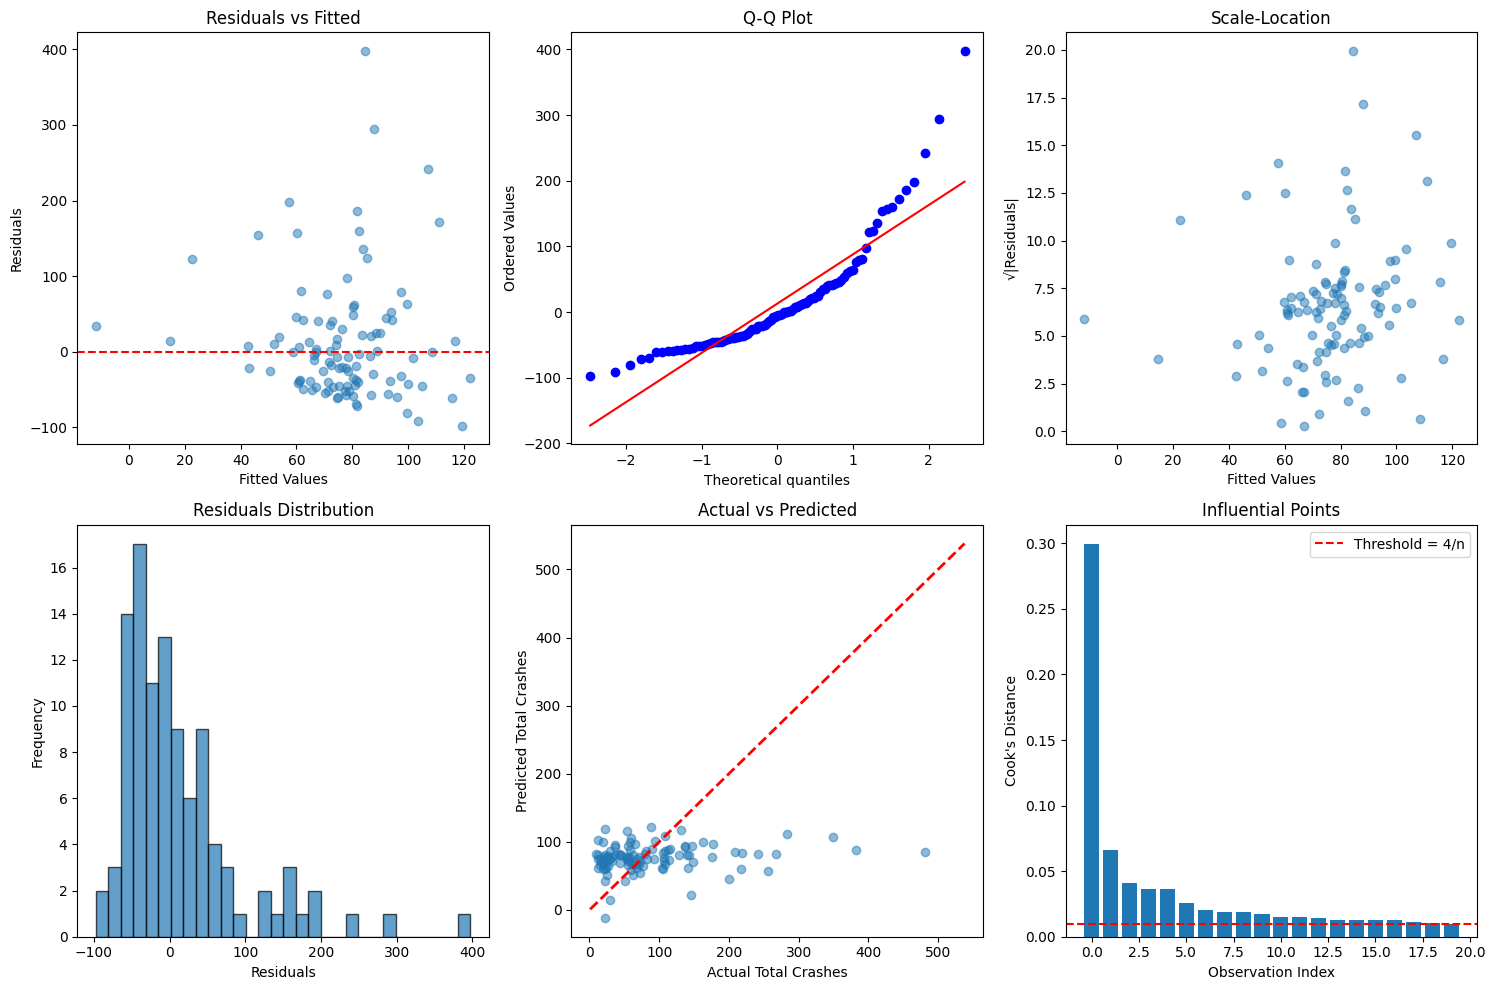


Number of influential points (Cook's d > 4/n): 20
Training R² = 0.0430
Test R² = 0.0073


In [6]:
# Linear Regression Analysis on Nigeria Crash Data (OLS)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import warnings
warnings.filterwarnings("ignore")

# Load data
df = pd.read_csv('Nigeria Crash Data Shuffled.csv')

# Select numeric predictors (avoid derived columns that cause multicollinearity)
feature_cols = [
    'Num_Injured', 'Num_Killed', 'Total_Vehicles_Involved',
    'SPV', 'DAD', 'PWR', 'FTQ', 'Other_Factors',
    'Quarter_Num', 'Year'
]
target = 'Total_Crashes'

df_clean = df[feature_cols + [target]].dropna()
X = df_clean[feature_cols]
y = df_clean[target]

print(f"Dataset shape: {X.shape}")
print("Features:", list(X.columns))

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize numeric features for better coefficient interpretation
scaler = StandardScaler()
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()
X_train_scaled[:] = scaler.fit_transform(X_train)
X_test_scaled[:] = scaler.transform(X_test)

# Add constant (intercept) for statsmodels
X_train_sm = sm.add_constant(X_train_scaled)
X_test_sm = sm.add_constant(X_test_scaled)

# Fit OLS model
model = sm.OLS(y_train, X_train_sm).fit()
print("\n" + "="*60)
print("OLS REGRESSION RESULTS")
print("="*60)
print(model.summary())

# Variance Inflation Factor (check multicollinearity)
vif_data = pd.DataFrame()
vif_data['Feature'] = X_train_sm.columns
vif_data['VIF'] = [variance_inflation_factor(X_train_sm.values, i) for i in range(X_train_sm.shape[1])]
print("\nVariance Inflation Factors (VIF):")
print(vif_data)

# Predictions on test set
y_pred = model.predict(X_test_sm)

# Performance metrics
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
print(f"\nTest Set Performance:")
print(f"R² = {r2:.4f}")
print(f"RMSE = {rmse:.2f}")
print(f"MAE = {mae:.2f}")

# Residuals
residuals = y_test - y_pred
fitted = y_pred

# Diagnostic plots
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# 1. Residuals vs Fitted
axes[0,0].scatter(fitted, residuals, alpha=0.5)
axes[0,0].axhline(0, color='r', linestyle='--')
axes[0,0].set_xlabel('Fitted Values')
axes[0,0].set_ylabel('Residuals')
axes[0,0].set_title('Residuals vs Fitted')

# 2. Q-Q plot of residuals
stats.probplot(residuals, dist="norm", plot=axes[0,1])
axes[0,1].set_title('Q-Q Plot')

# 3. Scale-Location (sqrt|residuals| vs fitted)
axes[0,2].scatter(fitted, np.sqrt(np.abs(residuals)), alpha=0.5)
axes[0,2].set_xlabel('Fitted Values')
axes[0,2].set_ylabel('√|Residuals|')
axes[0,2].set_title('Scale-Location')

# 4. Histogram of residuals
axes[1,0].hist(residuals, bins=30, edgecolor='k', alpha=0.7)
axes[1,0].set_xlabel('Residuals')
axes[1,0].set_ylabel('Frequency')
axes[1,0].set_title('Residuals Distribution')

# 5. Actual vs Predicted
axes[1,1].scatter(y_test, y_pred, alpha=0.5)
axes[1,1].plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
axes[1,1].set_xlabel('Actual Total Crashes')
axes[1,1].set_ylabel('Predicted Total Crashes')
axes[1,1].set_title('Actual vs Predicted')

# 6. Cook's distance (influential points)
influence = model.get_influence()
cooks = influence.cooks_distance[0]
n = len(X_train)
cooks_threshold = 4/n
cooks_series = pd.Series(cooks, index=X_train.index)
top_influential = cooks_series[cooks_series > cooks_threshold].sort_values(ascending=False)
axes[1,2].bar(range(len(top_influential)), top_influential.values)
axes[1,2].axhline(y=cooks_threshold, color='r', linestyle='--', label=f'Threshold = 4/n')
axes[1,2].set_xlabel('Observation Index')
axes[1,2].set_ylabel("Cook's Distance")
axes[1,2].set_title('Influential Points')
axes[1,2].legend()

plt.tight_layout()
plt.show()

print(f"\nNumber of influential points (Cook's d > 4/n): {len(top_influential)}")



from sklearn.metrics import r2_score

# ... after fitting model and making predictions ...

train_r2 = model.rsquared
test_r2 = r2_score(y_test, y_pred)

print(f"Training R² = {train_r2:.4f}")
print(f"Test R² = {test_r2:.4f}")